# 타이타닉 생존자 예측

In [2]:
import pandas as pd

titanic_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls"

titanic = pd.read_excel(titanic_url)

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

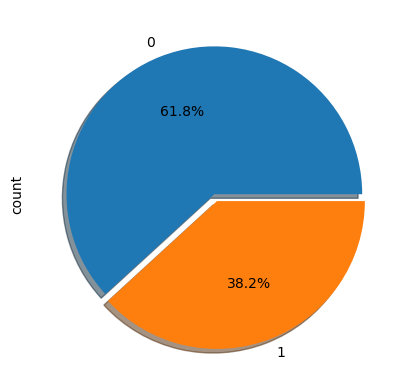

In [13]:
titanic['survived'].value_counts().plot.pie(autopct='%1.1f%%',
                                            shadow=True,
                                            explode=[0, 0.05]);

<Axes: xlabel='survived', ylabel='count'>

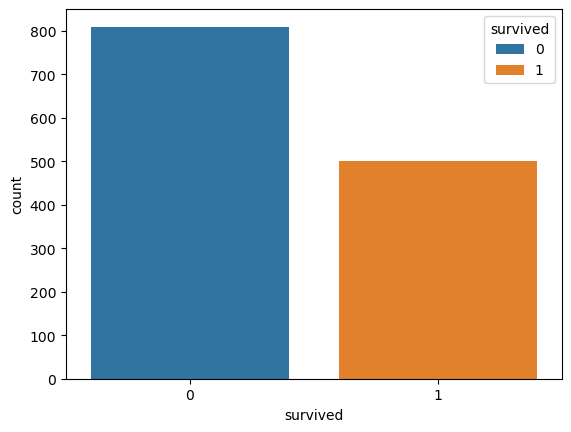

In [20]:
sns.countplot(x='survived', data=titanic, hue='survived')

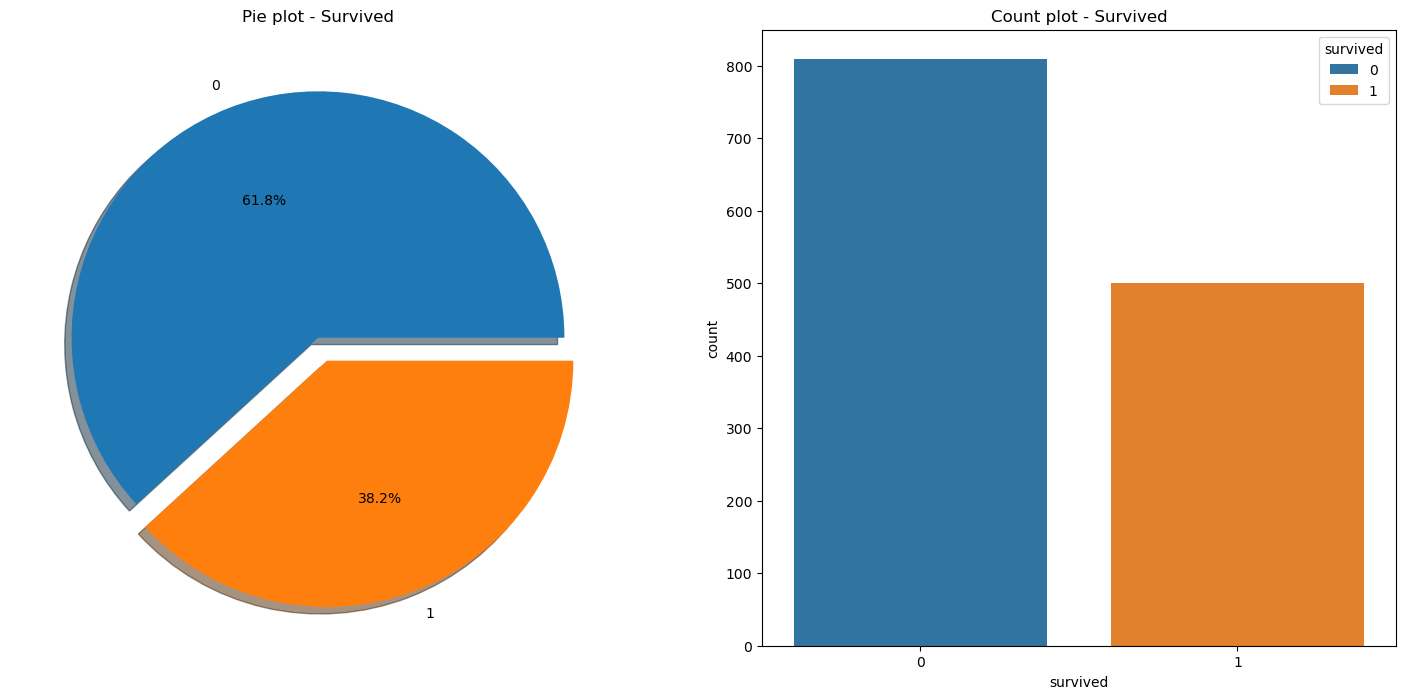

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

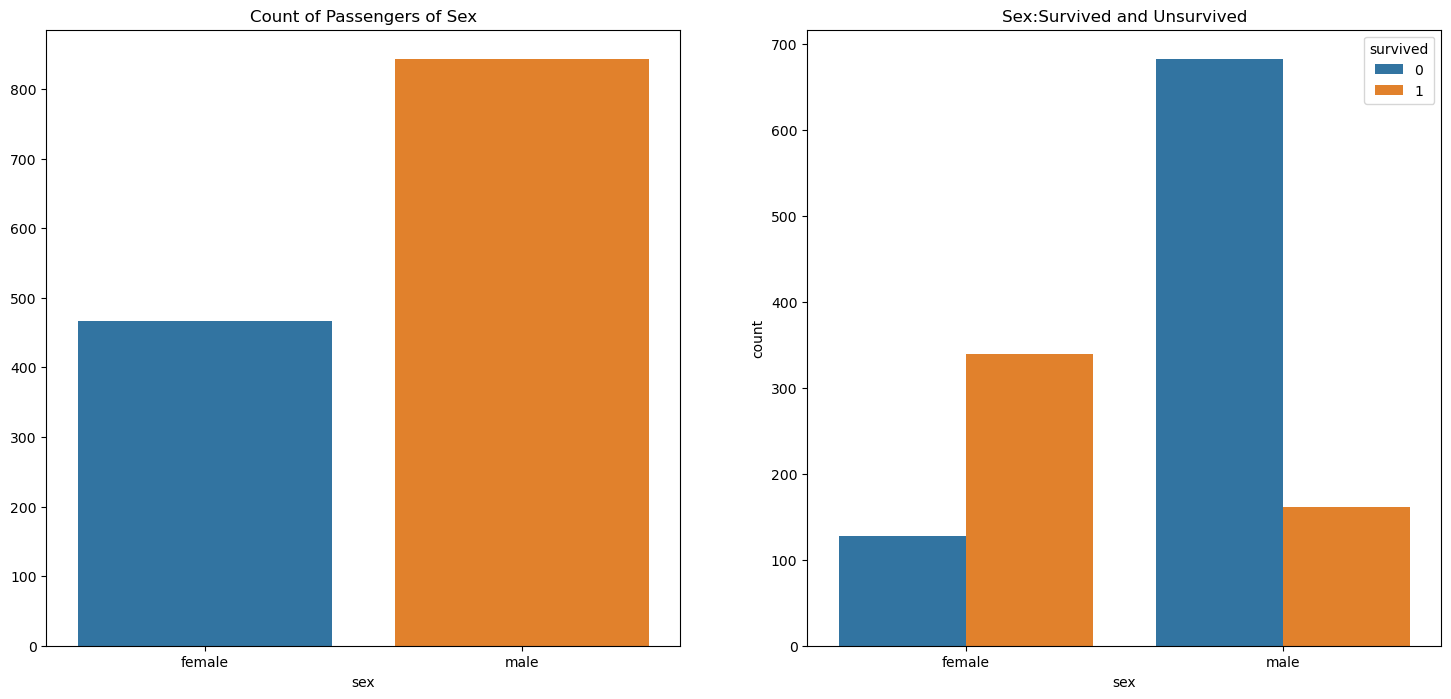

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='sex', data=titanic, hue='sex', ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')

plt.show()

In [25]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


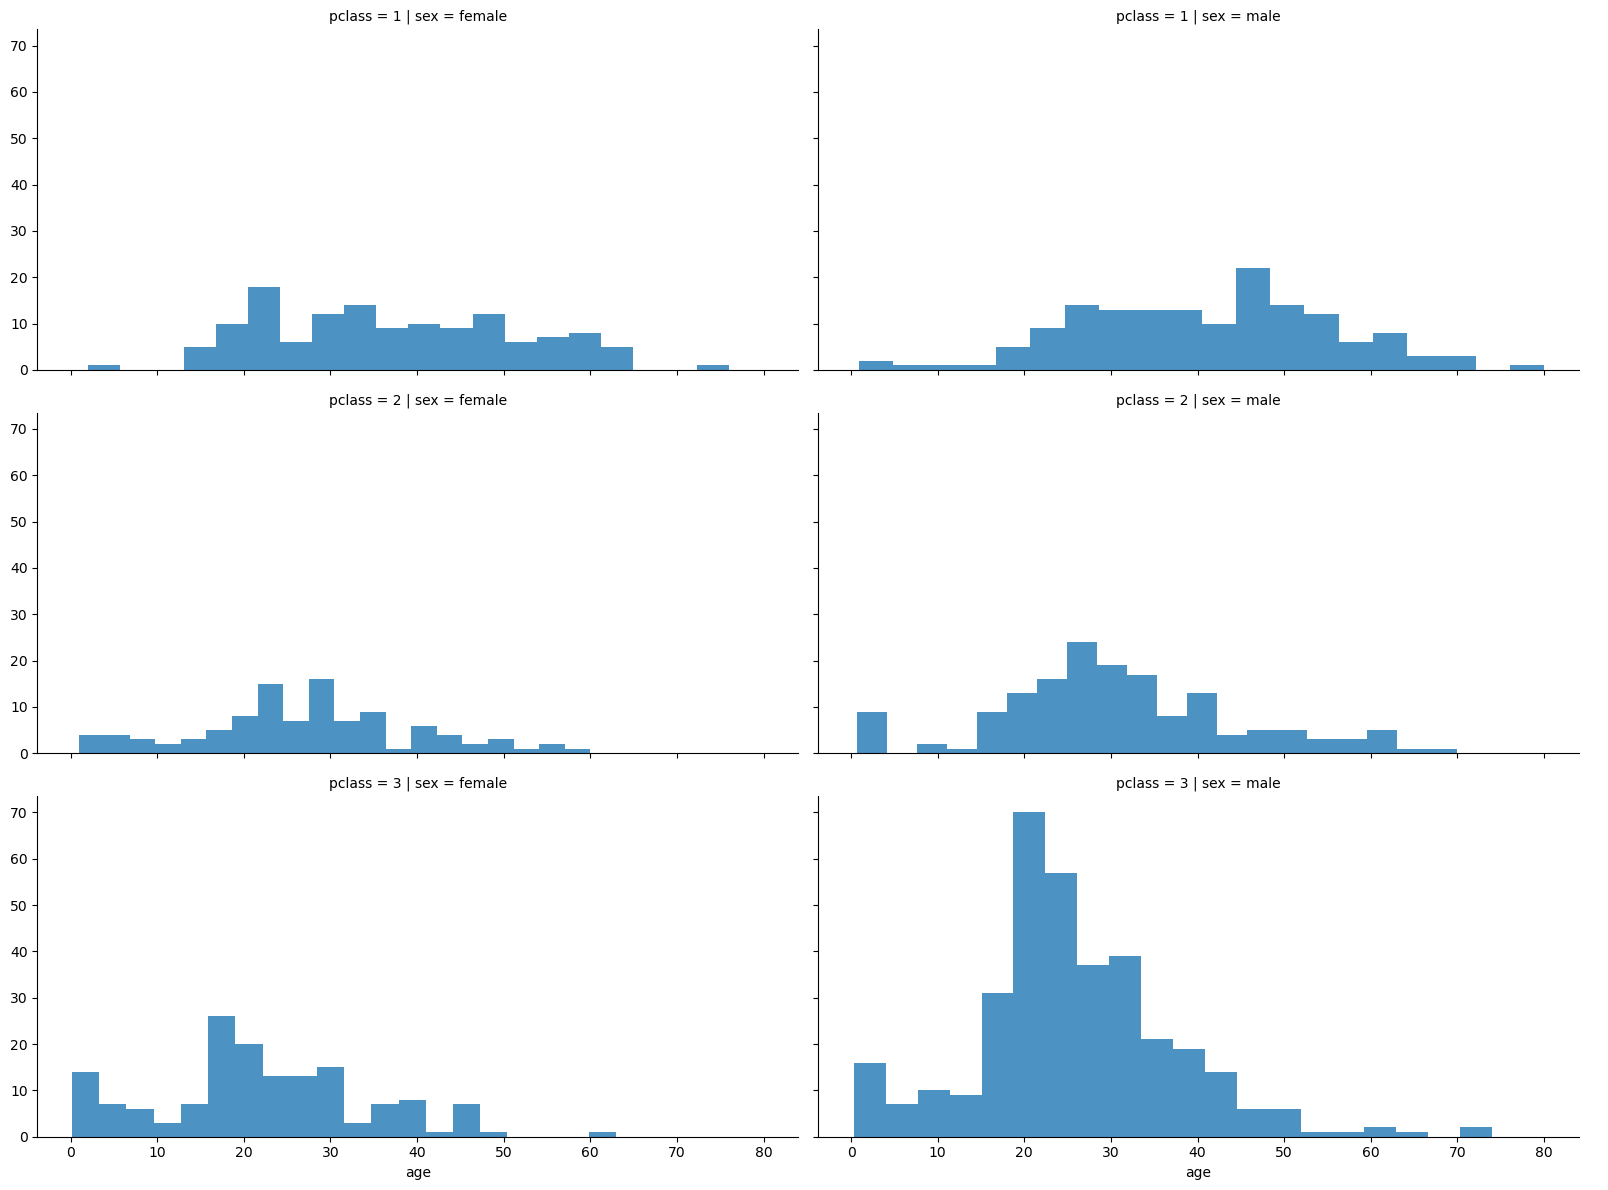

In [26]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()

In [27]:
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

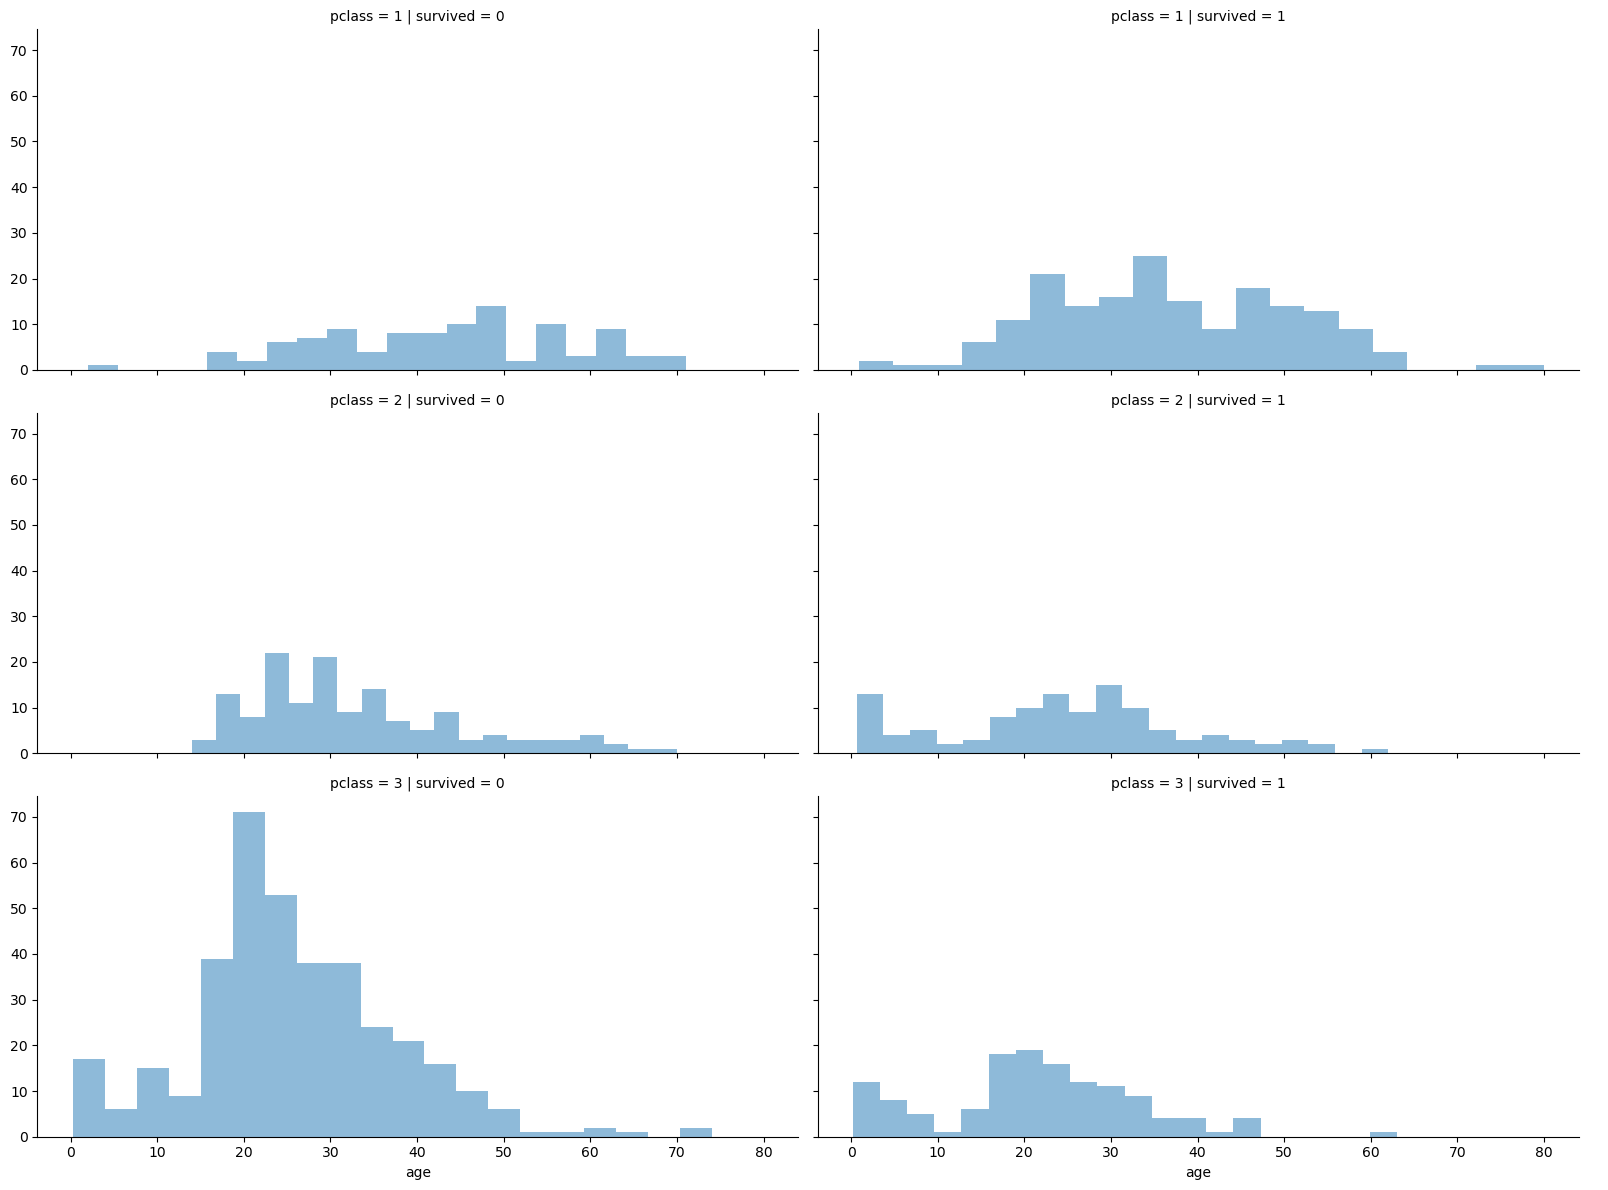

In [29]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [32]:
titanic['name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [35]:
import re

for idx, dataset in titanic.iterrows() :
    tmp = dataset['name']
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())

, Miss.
, Master.
, Miss.
, Mr.
, Mrs.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mr.
, Col.
, Mrs.
, Mme.
, Miss.
, Mr.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Mrs.
, Mr.
, Miss.
, Miss.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Mr.
, Miss.
, Miss.
, Mr.
, Miss.
, Miss.
, Mr.
, Mr.
, Mr.
, Dr.
, Mrs.
, Mrs.
, Mrs.
, Miss.
, Major.
, Mr.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mr.
, Master.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Miss.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mrs.
, Mr.
, Capt.
, Miss.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Dr.
, Master.
, Mrs.
, Mr.
, Mrs.
, Mrs.
, Lady.
, Sir.
, Mr.
, Mrs.
, Miss.
, Miss.
, Miss.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Miss.
, Miss.
, Miss.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Dr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.
, Miss.
, Miss.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.
, Col.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.

In [43]:
title = []
for idx, dataset in titanic.iterrows() :
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

titanic['title'] = title

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [44]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [45]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [46]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']

for each in Rare_f :
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m :
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

In [47]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [48]:
titanic[['title', 'survived']].groupby(by='title', as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


In [49]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Rare_m
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Mr


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])

le

LabelEncoder()

In [53]:
le.classes_

array(['female', 'male'], dtype=object)

In [58]:
titanic['gender'] = le.transform(titanic['sex'])

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0


In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
 14  title      1309 non-null   object 
 15  gender     1309 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [60]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  title      1045 non-null   object 
 15  gender     1045 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 138.8+ KB


<Axes: >

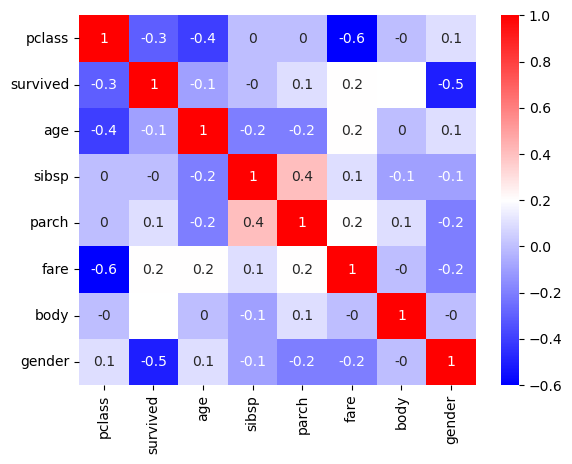

In [65]:
corr_df = titanic[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body', 'gender']]
correlation_matrix = corr_df.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [69]:
from sklearn.model_selection import train_test_split

x = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=13)

x_train.shape, x_test.shape

((836, 6), (209, 6))

In [70]:
x_train

,pclass,age,sibsp,parch,fare,gender
996,3,33.0,0,0,7.8958,1
306,1,54.0,0,1,77.2875,1
636,3,18.0,1,0,17.8000,0
862,3,22.0,0,0,8.9625,0
730,3,27.0,0,0,7.8958,1
...,...,...,...,...,...,...
1017,3,21.0,0,0,7.7750,1
822,3,41.0,0,0,7.8500,1
83,1,64.0,1,1,26.5500,0
200,1,46.0,0,0,75.2417,1


In [72]:
y_train

996     0
306     0
636     0
862     1
730     0
       ..
1017    1
822     0
83      1
200     0
378     0
Name: survived, Length: 836, dtype: int64

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 모델 생성 및 훈련
dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(x_train, y_train)

# 예측
pred = dt.predict(x_test)

# 정확도
accuracy_score(y_test, pred)

0.7655502392344498

In [76]:
pred1 = dt.predict(titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']])

accuracy_score(y, pred1)

0.815311004784689

In [77]:
import numpy as np

# feature : 'pclass', 'age', 'sibsp', 'parch', 'fare', 'gender'
dicaprio = np.array([[3, 18, 0, 0, 5, 1]])

dt.predict_proba(dicaprio)

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([[0.83271375, 0.16728625]])

In [80]:
print("Dicaprio : ", dt.predict_proba(dicaprio)[0, 1]);

Dicaprio :  0.16728624535315986


/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [81]:
# feature : 'pclass', 'age', 'sibsp', 'parch', 'fare', 'gender'
winslet = np.array([[1, 16, 1, 1, 100, 0]])

print("Winslet : ", dt.predict_proba(winslet)[0, 1])

Winslet :  1.0


/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

